In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('data-files/credit_train2.csv')
original_dataframe = dataframe.copy()

In [3]:
print("Number of rows:", dataframe.shape[0])
print("Number of columns:", dataframe.shape[1])

Number of rows: 100514
Number of columns: 19


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [5]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [6]:
dataframe.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [7]:
dataframe['Credit Score'].describe()

count    80846.000000
mean      1076.456089
std       1475.403791
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64

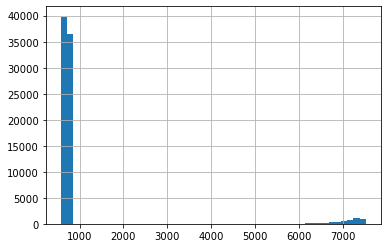

In [8]:
dataframe['Credit Score'].hist(bins=50)
plt.show()

In [9]:
df = dataframe[dataframe['Credit Score'] > 800]
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.0,Short Term,7120.0,537472.0,10+ years,Rent,Debt Consolidation,5777.90,14.8,NaN,4.0,0.0,132468.0,164406.0,0.0,0.0
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692.0,Long Term,6610.0,527839.0,10+ years,Rent,Debt Consolidation,14207.63,17.0,48.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.0,Short Term,7380.0,728726.0,4 years,Rent,major_purchase,10135.36,11.4,NaN,8.0,0.0,104633.0,199936.0,0.0,0.0
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.0,Long Term,7370.0,1028774.0,6 years,Home Mortgage,Debt Consolidation,22632.99,19.3,NaN,5.0,0.0,474658.0,742720.0,0.0,0.0


In [10]:
df['Credit Score'].head(10)

5      7290.0
43     7120.0
51     6610.0
56     7380.0
65     7370.0
97     6240.0
117    7210.0
160    7500.0
165    7020.0
200    7080.0
Name: Credit Score, dtype: float64

In [11]:
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: (val / 10) if val > 850 else val)

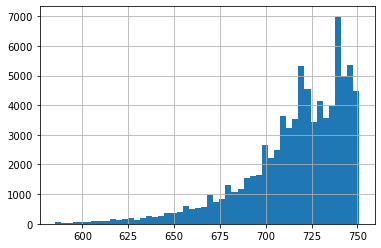

In [12]:
dataframe['Credit Score'].hist(bins=50)
plt.show()

In [13]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [14]:
original_dataframe['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [15]:
print(original_dataframe['Loan Status'].isna().sum())
original_dataframe['Loan Status'].isna().sum() / original_dataframe.shape[0] # 0.5%정도의 na데이터

514


0.005113715502318085

In [16]:
dataframe.dropna(subset=['Loan Status'], inplace = True) # remove NA rows

In [17]:
le = preprocessing.LabelEncoder()
dataframe['Loan Status'] = le.fit_transform(dataframe['Loan Status'])

In [18]:
dataframe['Loan Status'].head(10)

0    1
1    1
2    1
3    1
4    1
5    0
6    1
7    0
8    1
9    1
Name: Loan Status, dtype: int32

In [19]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


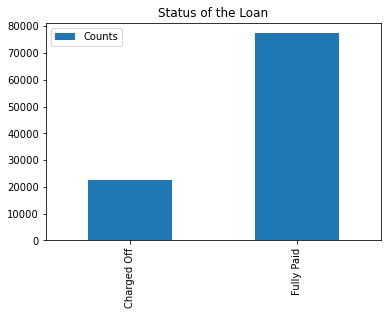

In [20]:
coffvalue = dataframe[dataframe['Loan Status'] == 0]['Loan Status'].count()
fpaidvalue = dataframe[dataframe['Loan Status'] == 1]['Loan Status'].count()
data = { "Counts":[coffvalue, fpaidvalue] }
statusDF = pd.DataFrame(data, index=["Charged Off", "Fully Paid"])
# statusDF.head()
statusDF.plot(kind='bar', title="Status of the Loan")
plt.show()

In [21]:
print("Value counts for each term: \n",dataframe['Term'].value_counts())
print("Missing data in loan term:",dataframe['Term'].isna().sum())

Value counts for each term: 
 Short Term    72208
Long Term     27792
Name: Term, dtype: int64
Missing data in loan term: 0


In [22]:
dataframe['Term'].replace(("Short Term","Long Term"),(0,1), inplace=True) # st와lt를 0,1로바꿔라
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [23]:
dataframe['Term'].head()

0    0
1    0
2    0
3    1
4    0
Name: Term, dtype: int64

In [24]:
scount = dataframe[dataframe['Term'] == 0]['Term'].count()
lcount = dataframe[dataframe['Term'] ==1]['Term'].count()

data = {"Counts":[scount, lcount]}
termDF = pd.DataFrame(data, index=["Short Term", "Long Term"])
termDF.head()

,Counts
Short Term,72208
Long Term,27792


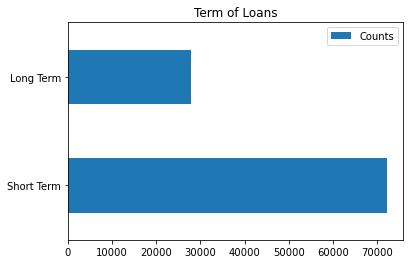

In [25]:
termDF.plot(kind="barh", title="Term of Loans")
plt.show()

In [26]:
print( dataframe['Credit Score'].isna().sum() )
print( dataframe['Credit Score'].isna().sum() / dataframe.shape[0] )

19154
0.19154


In [27]:
cscoredf = dataframe[dataframe['Term']==0] # 장기
stermAVG = cscoredf['Credit Score'].mean()
print(stermAVG)

724.6209386906824


In [28]:
lscoredf = dataframe[dataframe['Term']==1] # 단기
ltermAVG = lscoredf['Credit Score'].mean()
print(ltermAVG)

695.483727170432


In [29]:
do_nothing = lambda: None

In [30]:
dataframe.loc[(dataframe.Term ==0) & (dataframe['Credit Score'].isnull()),'Credit Score'] = stermAVG # term이 0이면서 cs가 null이면 cs를 stermavg로!

In [31]:
dataframe.loc[(dataframe.Term ==1) & (dataframe['Credit Score'].isnull()),'Credit Score'] = ltermAVG

In [32]:
dataframe['Credit Score'].head()

0    709.000000
1    724.620939
2    741.000000
3    721.000000
4    724.620939
Name: Credit Score, dtype: float64

In [33]:
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val)
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val)

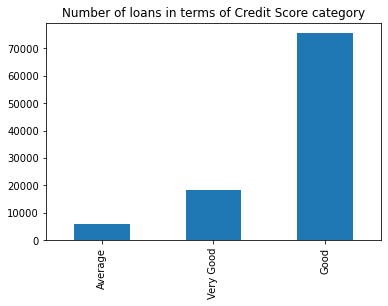

In [34]:
dataframe['Credit Score'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Number of loans in terms of Credit Score category')
plt.show()

In [35]:
dataframe['Credit Score'].value_counts()

Good         75506
Very Good    18479
Average       6015
Name: Credit Score, dtype: int64

In [36]:
print( dataframe['Annual Income'].isna().sum() )
print( dataframe['Annual Income'].isna().sum() / dataframe.shape[0] )

19154
0.19154


In [37]:
dataframe['Annual Income'].fillna(dataframe['Annual Income'].mean(), inplace=True)

In [38]:
dataframe['Annual Income'].head()

0    1.167493e+06
1    1.378277e+06
2    2.231892e+06
3    8.069490e+05
4    1.378277e+06
Name: Annual Income, dtype: float64

In [39]:
dataframe['Credit Score'].head()

0         Good
1         Good
2    Very Good
3         Good
4         Good
Name: Credit Score, dtype: object

In [40]:
# pd.get_dummies(dataframe['Credit Score'], drop_first=False).head()
pd.get_dummies(dataframe['Credit Score'], drop_first=True).head() # 데이터 사이즈 줄이기 위해 하나의 항목 지운 것

,Good,Very Good
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [41]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Credit Score'], drop_first = True))

In [42]:
dataframe.rename(index = str, columns={ 'Good':'Credit Good', 'Very Good':'Credit Very Good' }, inplace=True)

In [43]:
dataframe[['Credit Good', 'Credit Very Good']].head()

,Credit Good,Credit Very Good
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [44]:
dataframe = dataframe.drop(['Credit Score'], axis=1)

In [45]:
dataframe['Purpose'].value_counts().sort_values(ascending=True)

renewable_energy           10
Educational Expenses       99
vacation                  101
wedding                   115
moving                    150
small_business            283
major_purchase            352
Take a Trip               573
Buy House                 678
Medical Bills            1127
Buy a Car                1265
Business Loan            1569
Other                    3250
Home Improvements        5839
other                    6037
Debt Consolidation      78552
Name: Purpose, dtype: int64

In [46]:
dataframe['Purpose'] = dataframe['Purpose'].apply(lambda val : val.lower())

In [47]:
dataframe['Purpose']

0         home improvements
1        debt consolidation
2        debt consolidation
3        debt consolidation
4        debt consolidation
                ...        
99995                 other
99996    debt consolidation
99997    debt consolidation
99998    debt consolidation
99999    debt consolidation
Name: Purpose, Length: 100000, dtype: object

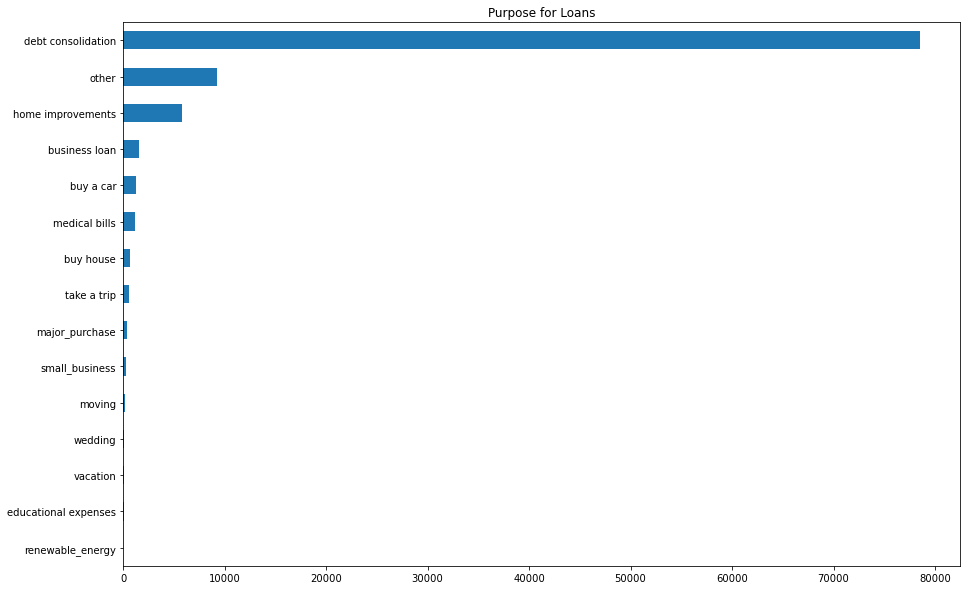

In [48]:
dataframe['Purpose'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Purpose for Loans", figsize=(15,10))
plt.show()

In [49]:
purposeloanstatus = dataframe[['Purpose','Loan Status']]
purposeloanstatus.head()

,Purpose,Loan Status
0,home improvements,1
1,debt consolidation,1
2,debt consolidation,1
3,debt consolidation,1
4,debt consolidation,1


In [50]:
pd.crosstab(purposeloanstatus['Purpose'], purposeloanstatus['Loan Status'])

Loan Status,0,1
Purpose,,
business loan,478,1091
buy a car,203,1062
buy house,140,538
debt consolidation,17918,60634
educational expenses,18,81
home improvements,1163,4676
major_purchase,82,270
medical bills,278,849
moving,43,107


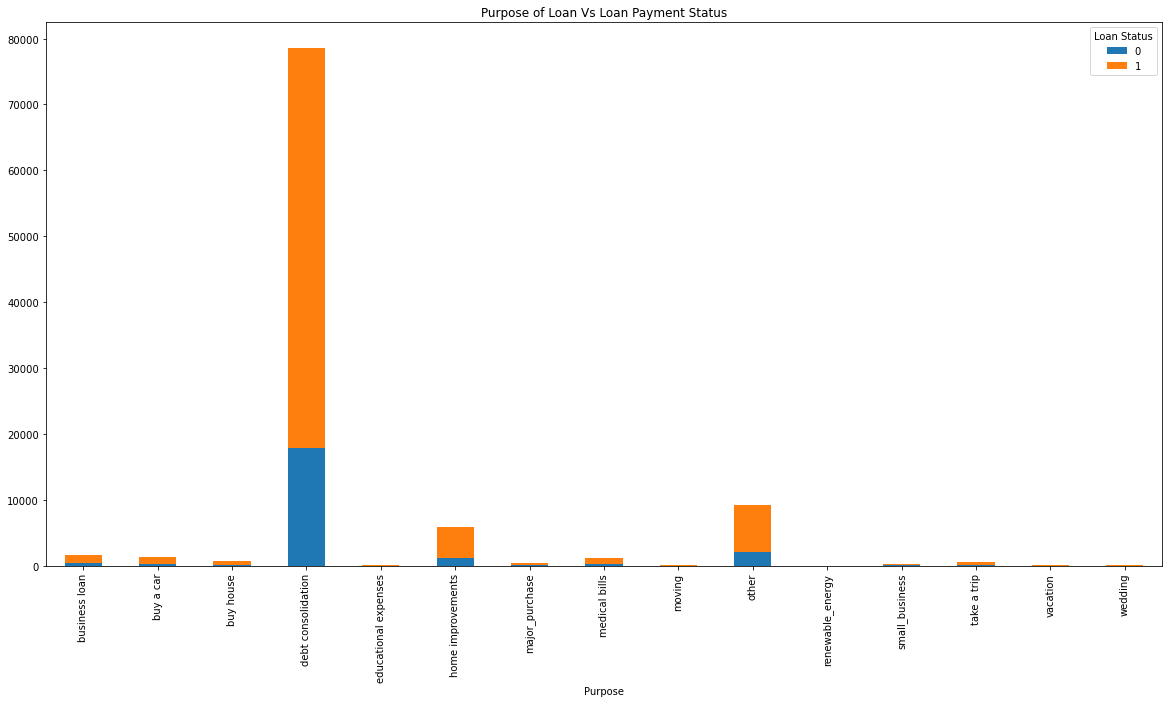

In [51]:
pd.crosstab(purposeloanstatus['Purpose'], purposeloanstatus['Loan Status']).plot(kind='bar', stacked=True, figsize=(20,10), 
                                                                                 title="Purpose of Loan Vs Loan Payment Status")
plt.show()

In [52]:
dataframe['Home Ownership'].value_counts().sort_values(ascending = True)

HaveMortgage       214
Own Home          9182
Rent             42194
Home Mortgage    48410
Name: Home Ownership, dtype: int64

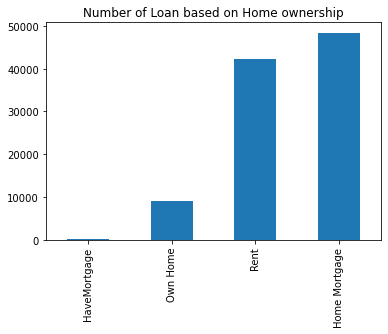

In [53]:
dataframe['Home Ownership'].value_counts().sort_values(ascending = True).plot(kind='bar', title="Number of Loan based on Home ownership")
plt.show()

In [54]:
pd.get_dummies(dataframe['Home Ownership'], drop_first = True).head()

,Home Mortgage,Own Home,Rent
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1


In [55]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Home Ownership'],drop_first = True))

In [56]:
dataframe = dataframe.drop(['Home Ownership'], axis=1)

In [57]:
dataframe['Years in current job'].head(10)

0      8 years
1    10+ years
2      8 years
3      3 years
4      5 years
5    10+ years
6     < 1 year
7     < 1 year
8      2 years
9     < 1 year
Name: Years in current job, dtype: object

In [58]:
dataframe['Years in current job'].str.extract(r"(\d+)").head()

,0
0,8
1,10
2,8
3,3
4,5


In [59]:
dataframe['Years in current job'] = dataframe['Years in current job'].str.extract(r"(\d+)")
dataframe['Years in current job'] = dataframe['Years in current job'].astype(float)

In [60]:
expmean = dataframe['Years in current job'].mean()

In [61]:
expmean

5.977594019503435

In [62]:
dataframe['Years in current job'].fillna(expmean, inplace=True)

In [63]:
dataframe['Years in current job']

0         8.000000
1        10.000000
2         8.000000
3         3.000000
4         5.000000
           ...    
99995     7.000000
99996     1.000000
99997     6.000000
99998     9.000000
99999     5.977594
Name: Years in current job, Length: 100000, dtype: float64

In [64]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="mean")
# dataframe['Years in current job'] = imputer.fit_transform(dataframe['Years in current job'].str.extract(r"(\d+)"))

In [65]:
dataframe['Employment History'] = dataframe['Years in current job'].apply(lambda x: "Emp Level Jr." if x < 4 
                                                                                                    else ("Emp Level Mid" if x > 4 and x < 8 
                                                                                                                          else "Emp Senior"))

In [66]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Purpose,Monthly Debt,Years of Credit History,...,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Good,Credit Very Good,Home Mortgage,Own Home,Rent,Employment History
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,1.167493e+06,8.0,home improvements,5214.74,17.2,...,228190.0,416746.0,1.0,0.0,1,0,1,0,0,Emp Senior
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,1.378277e+06,10.0,debt consolidation,33295.98,21.1,...,229976.0,850784.0,0.0,0.0,1,0,1,0,0,Emp Senior
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,2.231892e+06,8.0,debt consolidation,29200.53,14.9,...,297996.0,750090.0,0.0,0.0,0,1,0,1,0,Emp Senior
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,8.069490e+05,3.0,debt consolidation,8741.90,12.0,...,256329.0,386958.0,0.0,0.0,1,0,0,1,0,Emp Level Jr.
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,1.378277e+06,5.0,debt consolidation,20639.70,6.1,...,253460.0,427174.0,0.0,0.0,1,0,0,0,1,Emp Level Mid


In [67]:
dataframe = dataframe.drop(['Years in current job'], axis=1)

In [68]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Employment History'],drop_first = True))

In [69]:
dataframe = dataframe.drop(['Employment History'], axis=1)

In [70]:
dataframe = dataframe.drop(['Loan ID','Customer ID','Purpose'], axis=1)

In [71]:
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Good,Credit Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior
0,1,445412.0,0,1.167493e+06,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,1,0,1,0,0,0,1
1,1,262328.0,0,1.378277e+06,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,0,1,0,0,0,1
2,1,99999999.0,0,2.231892e+06,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,1,0,0,1
3,1,347666.0,1,8.069490e+05,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,1,0,0,0
4,1,176220.0,0,1.378277e+06,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,1,0,0,0,1,1,0


In [72]:
dataframe['Credit Problems'] = dataframe['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x == 0 
                                                                                                          else ("Some Credit promblem" if x > 0 and x < 5 
                                                                                                                                       else "Major Credit Problems"))

In [73]:
dataframe['Credit Problems'].value_counts()

No Credit Problem        86035
Some Credit promblem     13879
Major Credit Problems       86
Name: Credit Problems, dtype: int64

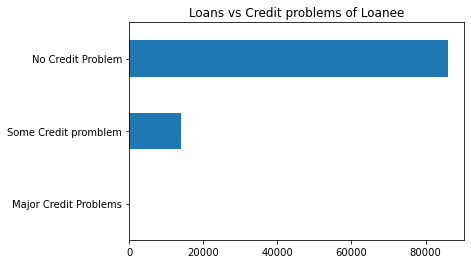

In [74]:
dataframe['Credit Problems'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Loans vs Credit problems of Loanee")
plt.show()

In [75]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Credit Problems'],drop_first = True))

In [76]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(sparse=False)
# ohe.fit_transform(dataframe['Credit Problems'].values.reshape(-1, 1))

In [77]:
dataframe = dataframe.drop(['Credit Problems','Number of Credit Problems'], axis=1)

In [78]:
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,...,Tax Liens,Credit Good,Credit Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem
0,1,445412.0,0,1.167493e+06,5214.74,17.2,NaN,6.0,228190.0,416746.0,...,0.0,1,0,1,0,0,0,1,0,1
1,1,262328.0,0,1.378277e+06,33295.98,21.1,8.0,35.0,229976.0,850784.0,...,0.0,1,0,1,0,0,0,1,1,0
2,1,99999999.0,0,2.231892e+06,29200.53,14.9,29.0,18.0,297996.0,750090.0,...,0.0,0,1,0,1,0,0,1,0,1
3,1,347666.0,1,8.069490e+05,8741.90,12.0,NaN,9.0,256329.0,386958.0,...,0.0,1,0,0,1,0,0,0,1,0
4,1,176220.0,0,1.378277e+06,20639.70,6.1,NaN,15.0,253460.0,427174.0,...,0.0,1,0,0,0,1,1,0,1,0


In [79]:
dataframe['Credit Age'] = dataframe['Years of Credit History'].apply(lambda x: "Short Credit Age" if x < 5 
                                                                                                  else ("Good Credit Age" if x > 5 and x < 17 
                                                                                                                          else "Exceptional Credit Age"))

In [80]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Credit Age'],drop_first = True))

In [81]:
dataframe = dataframe.drop(['Credit Age','Years of Credit History'], axis =1)
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Credit Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age
0,1,445412.0,0,1.167493e+06,5214.74,NaN,6.0,228190.0,416746.0,1.0,...,0,1,0,0,0,1,0,1,0,0
1,1,262328.0,0,1.378277e+06,33295.98,8.0,35.0,229976.0,850784.0,0.0,...,0,1,0,0,0,1,1,0,0,0
2,1,99999999.0,0,2.231892e+06,29200.53,29.0,18.0,297996.0,750090.0,0.0,...,1,0,1,0,0,1,0,1,1,0
3,1,347666.0,1,8.069490e+05,8741.90,NaN,9.0,256329.0,386958.0,0.0,...,0,0,1,0,0,0,1,0,1,0
4,1,176220.0,0,1.378277e+06,20639.70,NaN,15.0,253460.0,427174.0,0.0,...,0,0,0,1,1,0,1,0,1,0


In [82]:
dataframe = dataframe.drop(['Months since last delinquent','Number of Open Accounts','Maximum Open Credit','Current Credit Balance','Monthly Debt'],axis=1)

In [83]:
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Bankruptcies,Tax Liens,Credit Good,Credit Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age
0,1,445412.0,0,1.167493e+06,1.0,0.0,1,0,1,0,0,0,1,0,1,0,0
1,1,262328.0,0,1.378277e+06,0.0,0.0,1,0,1,0,0,0,1,1,0,0,0
2,1,99999999.0,0,2.231892e+06,0.0,0.0,0,1,0,1,0,0,1,0,1,1,0
3,1,347666.0,1,8.069490e+05,0.0,0.0,1,0,0,1,0,0,0,1,0,1,0
4,1,176220.0,0,1.378277e+06,0.0,0.0,1,0,0,0,1,1,0,1,0,1,0


In [84]:
dataframe['Tax Liens'] = dataframe['Tax Liens'].apply(lambda x: "No Tax Lien" if x == 0 
                                                                              else ("Some Tax Liens" if x > 0 and x < 3 
                                                                                                     else "Many Tax Liens"))

In [85]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Tax Liens'],drop_first = True))

In [86]:
dataframe = dataframe.drop(['Tax Liens'],axis=1)
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Bankruptcies,Credit Good,Credit Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens
0,1,445412.0,0,1.167493e+06,1.0,1,0,1,0,0,0,1,0,1,0,0,1,0
1,1,262328.0,0,1.378277e+06,0.0,1,0,1,0,0,0,1,1,0,0,0,1,0
2,1,99999999.0,0,2.231892e+06,0.0,0,1,0,1,0,0,1,0,1,1,0,1,0
3,1,347666.0,1,8.069490e+05,0.0,1,0,0,1,0,0,0,1,0,1,0,1,0
4,1,176220.0,0,1.378277e+06,0.0,1,0,0,0,1,1,0,1,0,1,0,1,0


In [87]:
dataframe['Bankruptcies'] = dataframe['Bankruptcies'].apply(lambda x: "No bankruptcies" if x == 0 
                                                                                        else ("Some Bankruptcies" if x > 0 and x < 3 
                                                                                                                  else "Many Bankruptcies"))

In [88]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Bankruptcies'],drop_first = True))

In [89]:
dataframe = dataframe.drop(['Bankruptcies'],axis=1)
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Credit Good,Credit Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
0,1,445412.0,0,1.167493e+06,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,1,262328.0,0,1.378277e+06,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0
2,1,99999999.0,0,2.231892e+06,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
3,1,347666.0,1,8.069490e+05,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0
4,1,176220.0,0,1.378277e+06,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0


In [90]:
dataframe.describe()

,Loan Status,Current Loan Amount,Term,Annual Income,Credit Good,Credit Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
count,100000.000000,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,0.773610,1.176045e+07,0.277920,1.378277e+06,0.755060,0.184790,0.48410,0.091820,0.421940,0.222720,0.458010,0.860350,0.138790,0.49848,0.001940,0.980620,0.017170,0.887740,0.10892
std,0.418496,3.178394e+07,0.447976,9.722974e+05,0.430054,0.388129,0.49975,0.288773,0.493872,0.416074,0.498236,0.346625,0.345729,0.50000,0.044003,0.137857,0.129905,0.315688,0.31154
min,0.000000,1.080200e+04,0.000000,7.662700e+04,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,1.796520e+05,0.000000,9.311805e+05,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.00000
50%,1.000000,3.122460e+05,0.000000,1.369919e+06,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.00000
75%,1.000000,5.249420e+05,1.000000,1.512704e+06,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.00000
max,1.000000,1.000000e+08,1.000000,1.655574e+08,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000


In [91]:
meanxoutlier = dataframe[dataframe['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
stddevxoutlier = dataframe[dataframe['Annual Income'] < 99999999.00 ]['Annual Income'].std()
poorline = meanxoutlier -  stddevxoutlier
richline = meanxoutlier + stddevxoutlier

In [92]:
dataframe['Annual Income'] = dataframe['Annual Income'].apply(lambda x: "Low Income" if x <= poorline 
                                                                                     else ("Average Income" if x > poorline and x < richline 
                                                                                                            else "High Income"))

In [93]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Annual Income'],drop_first = True))

In [94]:
dataframe = dataframe.drop(['Annual Income'], axis=1)
dataframe.head()

,Loan Status,Current Loan Amount,Term,Credit Good,Credit Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,High Income,Low Income
0,1,445412.0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,262328.0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0
2,1,99999999.0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,1,347666.0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0
4,1,176220.0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0


In [95]:
lmeanxoutlier = dataframe[dataframe['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
lstddevxoutlier = dataframe[dataframe['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
lowrange = lmeanxoutlier - lstddevxoutlier
highrange = lmeanxoutlier + lstddevxoutlier
print(lowrange, highrange)

126051.43019084871 498575.7655703696


In [96]:
dataframe['Current Loan Amount'] = dataframe['Current Loan Amount'].apply(lambda x: "Small Loan" if x <= lowrange 
                                                                                                 else ("Medium Loan" if x > lowrange and x < highrange 
                                                                                                                     else "Big Loan"))

In [97]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Current Loan Amount'],drop_first = True))

In [98]:
dataframe = dataframe.drop(['Current Loan Amount'], axis=1)

In [99]:
dataframe.head()

,Loan Status,Term,Credit Good,Credit Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,...,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,High Income,Low Income,Medium Loan,Small Loan
0,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,1,0,1,0,1,0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
2,1,0,0,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0
3,1,1,1,0,0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,0,0,1,1,0,1,...,1,0,1,0,1,0,0,0,1,0


In [100]:
dataframe.to_csv('data-files/credit2.csv', encoding='utf-8', index=False)